In [1]:
import xarray as xr
import xesmf as xe
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import dask
import cftime
import random
import glob
import matplotlib.gridspec as gs
import pint_xarray
import cf_xarray as cfxr
from eofs.xarray import Eof

In [2]:
from dask.distributed import Client, LocalCluster
client = Client()
client

<Client: 'tcp://127.0.0.1:44211' processes=7 threads=14, memory=63.00 GiB>

In [11]:
#load daily sst from scratch?
CP_daily = xr.open_mfdataset("/scratch/e14/sm2435/archive/dd756/history/ocn/ocean_daily*",  use_cftime=True, chunks = {"time":365})

In [18]:
CP_sst = CP_daily.sst

In [14]:
ctrl_daily = xr.open_mfdataset("/g/data/hh5/tmp/zg0866/ACCESS-CM2_archive/cm000/history/ocn/ocean_daily*",  use_cftime=True, chunks = {"time":365})

In [17]:
ctrl_sst = ctrl_daily.sst

In [35]:
ctrl_sst.resample(time='1D').mean()

2024-03-08 15:26:06,927 - distributed.scheduler - WARNING - Received heartbeat from unregistered worker 'tcp://127.0.0.1:36415'.
2024-03-08 15:26:06,961 - distributed.scheduler - WARNING - Received heartbeat from unregistered worker 'tcp://127.0.0.1:34023'.
2024-03-08 15:26:06,968 - distributed.scheduler - WARNING - Received heartbeat from unregistered worker 'tcp://127.0.0.1:33929'.
2024-03-08 15:26:06,970 - distributed.scheduler - WARNING - Received heartbeat from unregistered worker 'tcp://127.0.0.1:35395'.
2024-03-08 15:26:06,972 - distributed.scheduler - WARNING - Received heartbeat from unregistered worker 'tcp://127.0.0.1:45249'.
2024-03-08 15:26:06,974 - distributed.scheduler - WARNING - Received heartbeat from unregistered worker 'tcp://127.0.0.1:37955'.
2024-03-08 15:26:06,976 - distributed.scheduler - WARNING - Received heartbeat from unregistered worker 'tcp://127.0.0.1:37645'.


KeyboardInterrupt: 

In [ ]:
(ctrl_sst.sel(time = "0990-01-04") - CP_sst.sel(time = "0990-01-04")).plot(vmin = -0.01)

In [ ]:
(ctrl_sst.sel(time = "0990-01-05") - CP_sst.sel(time = "0990-01-05")).plot(vmin = -0.01)

In [ ]:
(ctrl_sst.sel(time = "0990-01-06") - CP_sst.sel(time = "0990-01-06")).plot(vmin = -0.01)

In [ ]:
(ctrl_sst.sel(time = "0990-01-07") - CP_sst.sel(time = "0990-01-07")).plot(vmin = -0.01)

In [28]:
test = xr.open_dataset("/g/data/e14/sm2435/Pacemaker/sst_restore_mask_25N_25S_5deg_damping_trop_pacific.nc", decode_times = False)

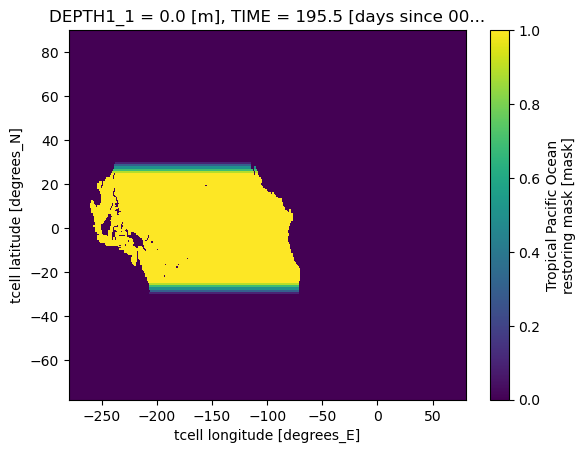

In [31]:
test.restore_mask[6,0].plot()

In [5]:
ctrl_sst = xr.open_dataset("/g/data/hh5/tmp/zg0866/ACCESS-CM2_archive/cm000/history/ocn/ocean_month.nc-09901231",  use_cftime=True, chunks= {"time":12})
ctrl = ctrl_sst.sst.compute()

In [4]:
new = xr.open_dataset("/g/data/e14/sm2435/Pacemaker/ocean_month.nc-09900131",  use_cftime=True, chunks= {"time":12})

In [5]:
new_u = new.u.compute()

In [6]:
ctrl_u = ctrl_sst.u.compute()

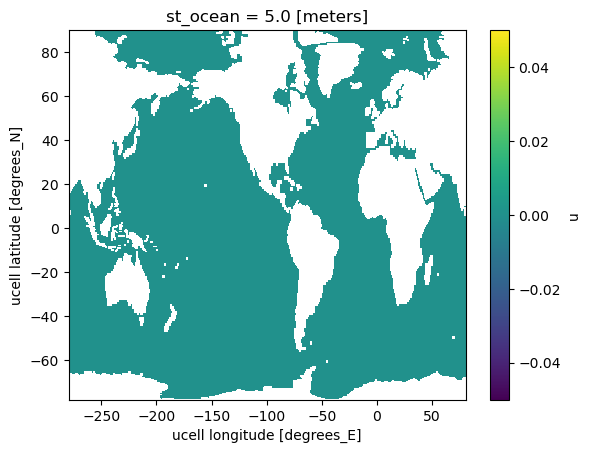

In [7]:
(ctrl_u[0,0] - new_u[0,0]).plot()

In [8]:
new = new.sst.compute()

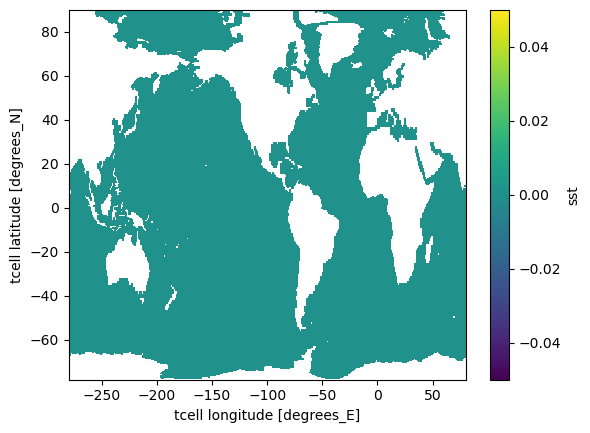

In [9]:
(ctrl[0] - new[0]).plot()

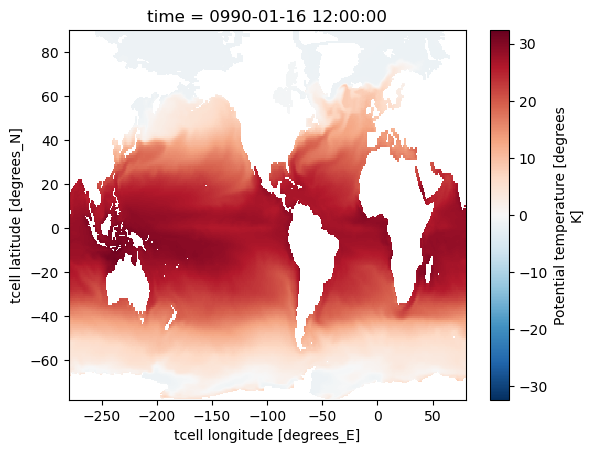

In [10]:
ctrl[0].plot()

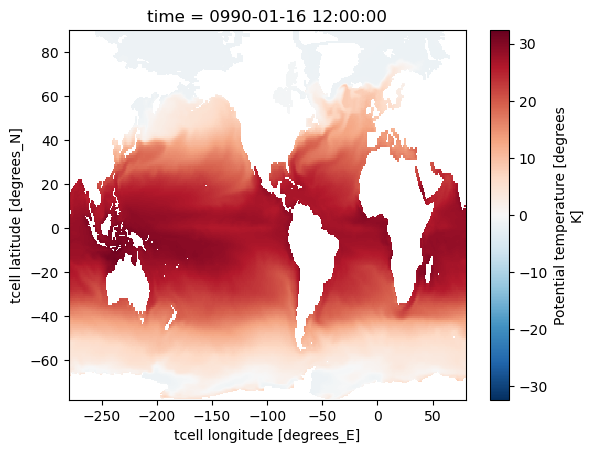

In [11]:
new[0].plot()

In [3]:
#load in ctrl dataset
ctrl_sst = xr.open_dataset("/g/data/e14/sm2435/Exps_ACCESS_initial/ctrl_sst.nc",  use_cftime=True, chunks= {"time":240})
ctrl = ctrl_sst.sst.compute()

In [4]:
def roll_lon(df):
    df.coords['xt_ocean'] = (df.coords['xt_ocean'] + 360) % 360# - 180
    df = df.sortby(df.xt_ocean)
    return df

In [5]:
ctrl = roll_lon(ctrl)

In [6]:
exp_dir = "/scratch/e14/sm2435/archive/"

In [7]:
suffix = "/history/ocn/ocean_month.nc*"

In [8]:
CP_had_ens_list = ["de419", "de420", "de421", "de422", "dd756"]
CP_mod_ens_list = ["de423", "de424", "de425", "de426", "de353"]
EP_had_ens_list = ["de427", "de428", "de429", "de430", "de354"]
EP_mod_ens_list = ["de431", "de432", "de433", "de434", "de355"]

In [9]:
new_time = ctrl.time[0:24]

In [10]:
CP_had_ens={}
for exp in CP_had_ens_list:
    ds = xr.open_mfdataset(exp_dir+exp+suffix, use_cftime=True, chunks= {"time":12})
    sst = ds.sst
    sst = roll_lon(sst)
    #change the time to 0000
    sst['time'] = new_time
    CP_had_ens[exp] = sst

In [11]:
CP_mod_ens={}
for exp in CP_mod_ens_list:
    ds = xr.open_mfdataset(exp_dir+exp+suffix, use_cftime=True, chunks= {"time":12})
    sst = ds.sst
    sst = roll_lon(sst)
    #change the time to 0000
    sst['time'] = new_time
    CP_mod_ens[exp] = sst

In [12]:
EP_had_ens={}
for exp in EP_had_ens_list:
    ds = xr.open_mfdataset(exp_dir+exp+suffix, use_cftime=True, chunks= {"time":12})
    sst = ds.sst
    sst = roll_lon(sst)
    #change the time to 0000
    sst['time'] = new_time
    EP_had_ens[exp] = sst

In [13]:
EP_mod_ens={}
for exp in EP_mod_ens_list:
    ds = xr.open_mfdataset(exp_dir+exp+suffix, use_cftime=True, chunks= {"time":12})
    sst = ds.sst
    sst = roll_lon(sst)
    #change the time to 0000
    sst['time'] = new_time
    EP_mod_ens[exp] = sst

In [14]:
def ssta(DS):
    clim = DS.groupby('time.month').mean('time')
    ssta = DS.groupby('time.month') - clim
    return ssta.drop("month")
def DMI_ctrl(DS):
    WTIO =  ssta(DS).sel(yt_ocean=slice(
         -10, 10),xt_ocean=slice(50, 70)).mean(['yt_ocean', 'xt_ocean'])
    SETIO =  ssta(DS).sel(yt_ocean=slice(
         -10, 0),xt_ocean=slice(90, 110)).mean(['yt_ocean', 'xt_ocean'])
    return (WTIO - SETIO)

def DMI_exp(DS):
    WTIO =  (DS).sel(yt_ocean=slice(
         -10, 10),xt_ocean=slice(50, 70)).mean(['yt_ocean', 'xt_ocean'])
    SETIO =  (DS).sel(yt_ocean=slice(
         -10, 0),xt_ocean=slice(90, 110)).mean(['yt_ocean', 'xt_ocean'])
    return (WTIO - SETIO)

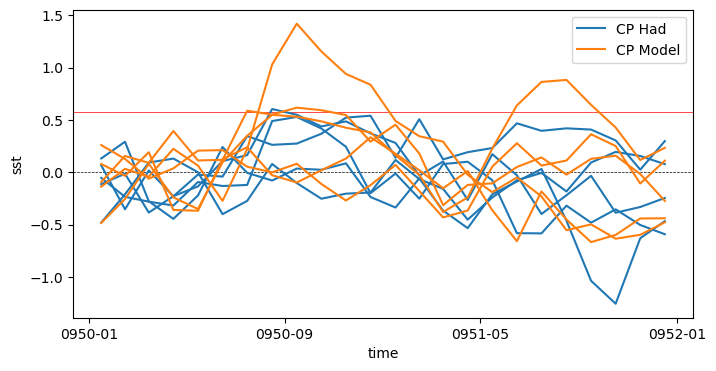

In [23]:
#plot figure
plt.figure(figsize = (8,4))
#now plot the 0 line and DMI threshold line
plt.axhline(DMI_ctrl(ctrl).groupby("time.season")["SON"].std("time").values, lw = 0.5, color = 'r')
plt.axhline(0, lw = 0.5, ls = "--", color = 'k')
i = 0
for key in CP_had_ens.keys():
    sst = CP_had_ens[key]
    SSTA = sst.groupby("time.month") - ctrl.groupby("time.month").mean("time")
    #give the
    dmi = DMI_exp(SSTA)
    if i==0:
        dmi.plot(c = 'tab:blue', label = 'CP Had')
    else:
         dmi.plot(c = 'tab:blue')
    i = i+1

i = 0
for key in CP_mod_ens.keys():
    sst = CP_mod_ens[key]
    SSTA = sst.groupby("time.month") - ctrl.groupby("time.month").mean("time")
    #give the
    dmi = DMI_exp(SSTA)
    if i==0:
        dmi.plot(c = 'tab:orange', label = 'CP Model')
    else:
         dmi.plot(c = 'tab:orange')
    i = i+1    
plt.legend()


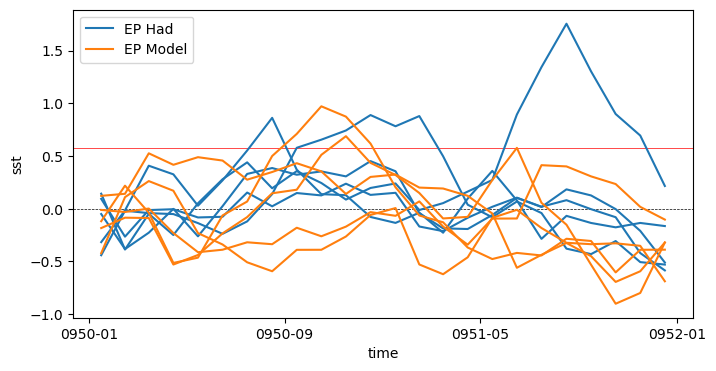

In [24]:
#plot figure
plt.figure(figsize = (8,4))
#now plot the 0 line and DMI threshold line
plt.axhline(DMI_ctrl(ctrl).groupby("time.season")["SON"].std("time").values, lw = 0.5, color = 'r')
plt.axhline(0, lw = 0.5, ls = "--", color = 'k')
i = 0
for key in EP_had_ens.keys():
    sst = EP_had_ens[key]
    SSTA = sst.groupby("time.month") - ctrl.groupby("time.month").mean("time")
    #give the
    dmi = DMI_exp(SSTA)
    if i==0:
        dmi.plot(c = 'tab:blue', label = 'EP Had')
    else:
         dmi.plot(c = 'tab:blue')
    i = i+1
i = 0
for key in EP_mod_ens.keys():
    sst = EP_mod_ens[key]
    SSTA = sst.groupby("time.month") - ctrl.groupby("time.month").mean("time")
    #give the
    dmi = DMI_exp(SSTA)
    if i==0:
        dmi.plot(c = 'tab:orange', label = 'EP Model')
    else:
         dmi.plot(c = 'tab:orange')
    i = i+1
plt.legend()

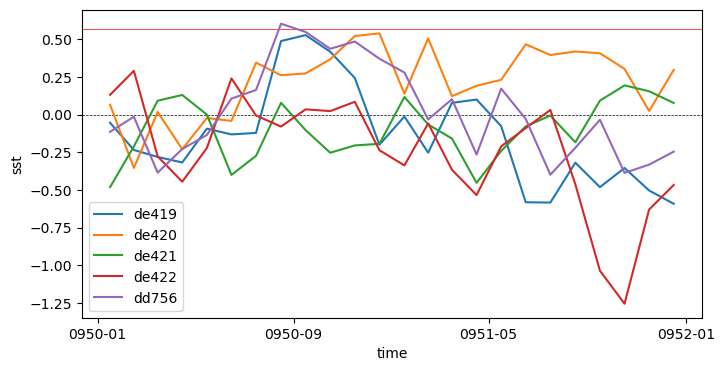

In [15]:
#plot figure
plt.figure(figsize = (8,4))
#now plot the 0 line and DMI threshold line
plt.axhline(DMI_ctrl(ctrl).groupby("time.season")["SON"].std("time").values, lw = 0.5, color = 'r')
plt.axhline(0, lw = 0.5, ls = "--", color = 'k')
for key in CP_had_ens.keys():
    sst = CP_had_ens[key]
    SSTA = sst.groupby("time.month") - ctrl.groupby("time.month").mean("time")
    #give the
    dmi = DMI_exp(SSTA)
    dmi.plot(label = key)
plt.legend()


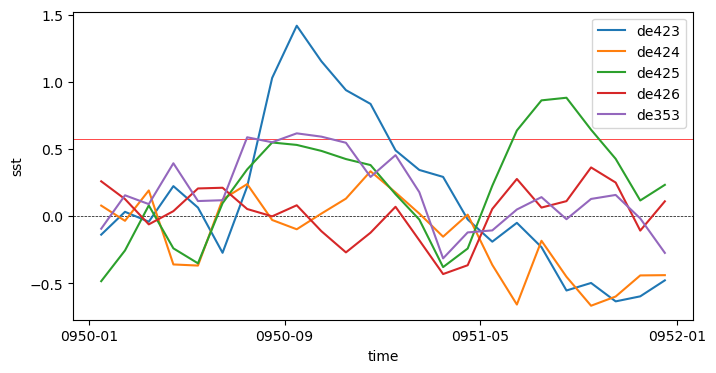

In [16]:
#plot figure
plt.figure(figsize = (8,4))
#now plot the 0 line and DMI threshold line
plt.axhline(DMI_ctrl(ctrl).groupby("time.season")["SON"].std("time").values, lw = 0.5, color = 'r')
plt.axhline(0, lw = 0.5, ls = "--", color = 'k')
for key in CP_mod_ens.keys():
    sst = CP_mod_ens[key]
    SSTA = sst.groupby("time.month") - ctrl.groupby("time.month").mean("time")
    #give the
    dmi = DMI_exp(SSTA)
    dmi.plot(label = key)
plt.legend()


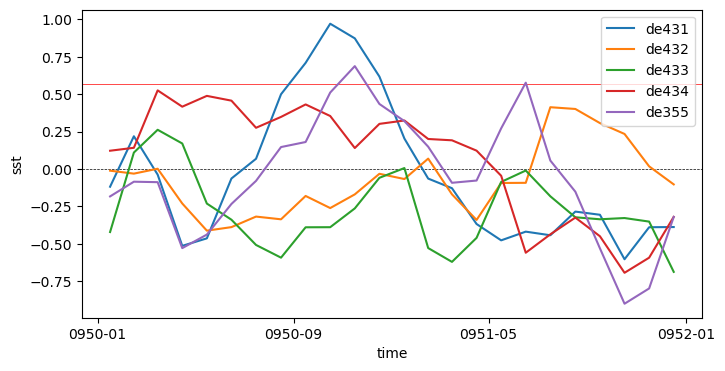

In [17]:
#plot figure
plt.figure(figsize = (8,4))
#now plot the 0 line and DMI threshold line
plt.axhline(DMI_ctrl(ctrl).groupby("time.season")["SON"].std("time").values, lw = 0.5, color = 'r')
plt.axhline(0, lw = 0.5, ls = "--", color = 'k')
for key in EP_mod_ens.keys():
    sst = EP_mod_ens[key]
    SSTA = sst.groupby("time.month") - ctrl.groupby("time.month").mean("time")
    #give the
    dmi = DMI_exp(SSTA)
    dmi.plot(label = key)
plt.legend()


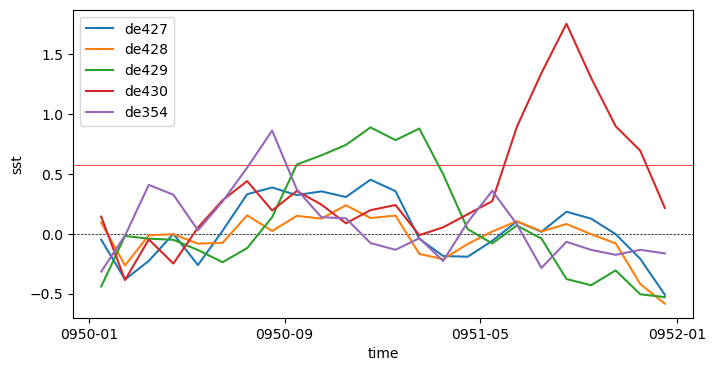

In [18]:
#plot figure
plt.figure(figsize = (8,4))
#now plot the 0 line and DMI threshold line
plt.axhline(DMI_ctrl(ctrl).groupby("time.season")["SON"].std("time").values, lw = 0.5, color = 'r')
plt.axhline(0, lw = 0.5, ls = "--", color = 'k')
for key in EP_had_ens.keys():
    sst = EP_had_ens[key]
    SSTA = sst.groupby("time.month") - ctrl.groupby("time.month").mean("time")
    #give the
    dmi = DMI_exp(SSTA)
    dmi.plot(label = key)
plt.legend()


In [19]:
plt.figure(figsize = (8,4))
DMI_exp(cp_hssta01).plot(label = "CP_Had")
DMI_exp(cp_mssta01).plot(label = "CP_Mod")
DMI_exp(ep_hssta01).plot(label = "EP_Had")
DMI_exp(ep_mssta01).plot(label = "EP_Mod")
ctrl_dmi_std.rename({"month": "time"}).assign_coords({"time": cp_hssta01.time[0:12]}).plot(label = "CTRL DMI standard deviation")
#DMI_exp(ctrl990).plot(label = "CTRL restart year")
plt.axhline(DMI_ctrl(ctrl).groupby("time.season")["SON"].std("time").values, lw = 0.5, color = 'r')
plt.axhline(0, lw = 0.5, ls = "--", color = 'k')
plt.legend()

NameError: name 'cp_hssta01' is not defined

<Figure size 800x400 with 0 Axes>

In [66]:
list1=[]
for key in EP_had_ens.keys():
    sst = EP_had_ens[key]
    list1.append(sst)

In [76]:
test = xr.Dataset(EP_had_ens)

In [78]:
test.de427+test.de427+test.de427+test.de427+test.de426

<xarray.DataArray 'de427' (time: 24, yt_ocean: 300, xt_ocean: 360)>
dask.array<getitem, shape=(24, 300, 360), dtype=float32, chunksize=(12, 300, 360), chunktype=numpy.ndarray>
Coordinates:
  * xt_ocean  (xt_ocean) float64 0.5 1.5 2.5 3.5 4.5 ... 356.5 357.5 358.5 359.5
  * yt_ocean  (yt_ocean) float64 -77.88 -77.63 -77.38 ... 88.87 89.32 89.77
  * time      (time) object 0950-01-16 12:00:00 ... 0951-12-16 12:00:00
    geolat_t  (yt_ocean, xt_ocean) float32 -77.88 -77.88 -77.88 ... 88.1 87.88
    geolon_t  (yt_ocean, xt_ocean) float32 0.5 1.5 2.5 3.5 ... 72.32 73.23 73.94
Attributes:
    long_name:      Potential temperature
    units:          degrees K
    valid_range:    [-10. 500.]
    cell_methods:   time: mean
    time_avg_info:  average_T1,average_T2,average_DT
    standard_name:  sea_surface_temperature

In [7]:
cp_had01 = xr.open_mfdataset(["/scratch/e14/sm2435/archive/dd756/history/ocn/ocean_month.nc-09901231","/scratch/e14/sm2435/archive/dd756/history/ocn/ocean_month.nc-09911231"],
                              use_cftime=True, chunks= {"time":12})

In [8]:
cp_mod01 = xr.open_mfdataset(["/scratch/e14/sm2435/archive/de353/history/ocn/ocean_month.nc-09901231","/scratch/e14/sm2435/archive/de353/history/ocn/ocean_month.nc-09911231"],
                              use_cftime=True, chunks= {"time":12})

In [9]:
ep_had01 = xr.open_mfdataset(["/scratch/e14/sm2435/archive/de354/history/ocn/ocean_month.nc-09901231","/scratch/e14/sm2435/archive/de354/history/ocn/ocean_month.nc-09911231"],
                              use_cftime=True, chunks= {"time":12})

In [10]:
ep_mod01 = xr.open_mfdataset(["/scratch/e14/sm2435/archive/de355/history/ocn/ocean_month.nc-09901231","/scratch/e14/sm2435/archive/de355/history/ocn/ocean_month.nc-09911231"],
                              use_cftime=True, chunks= {"time":12})

In [11]:
cp_hsst01 = cp_had01.sst.compute()
cp_msst01 = cp_mod01.sst.compute()
ep_hsst01 = ep_had01.sst.compute()
ep_msst01 = ep_mod01.sst.compute()

In [12]:
cp_hsst01 = roll_lon(cp_hsst01)
cp_msst01 = roll_lon(cp_msst01)
ep_hsst01 = roll_lon(ep_hsst01)
ep_msst01 = roll_lon(ep_msst01)

In [14]:
cp_hssta01 = cp_hsst01.groupby("time.month") - ctrl.groupby("time.month").mean("time")
cp_mssta01 = cp_msst01.groupby("time.month") - ctrl.groupby("time.month").mean("time")
ep_hssta01 = ep_hsst01.groupby("time.month") - ctrl.groupby("time.month").mean("time")
ep_mssta01 = ep_msst01.groupby("time.month") - ctrl.groupby("time.month").mean("time")

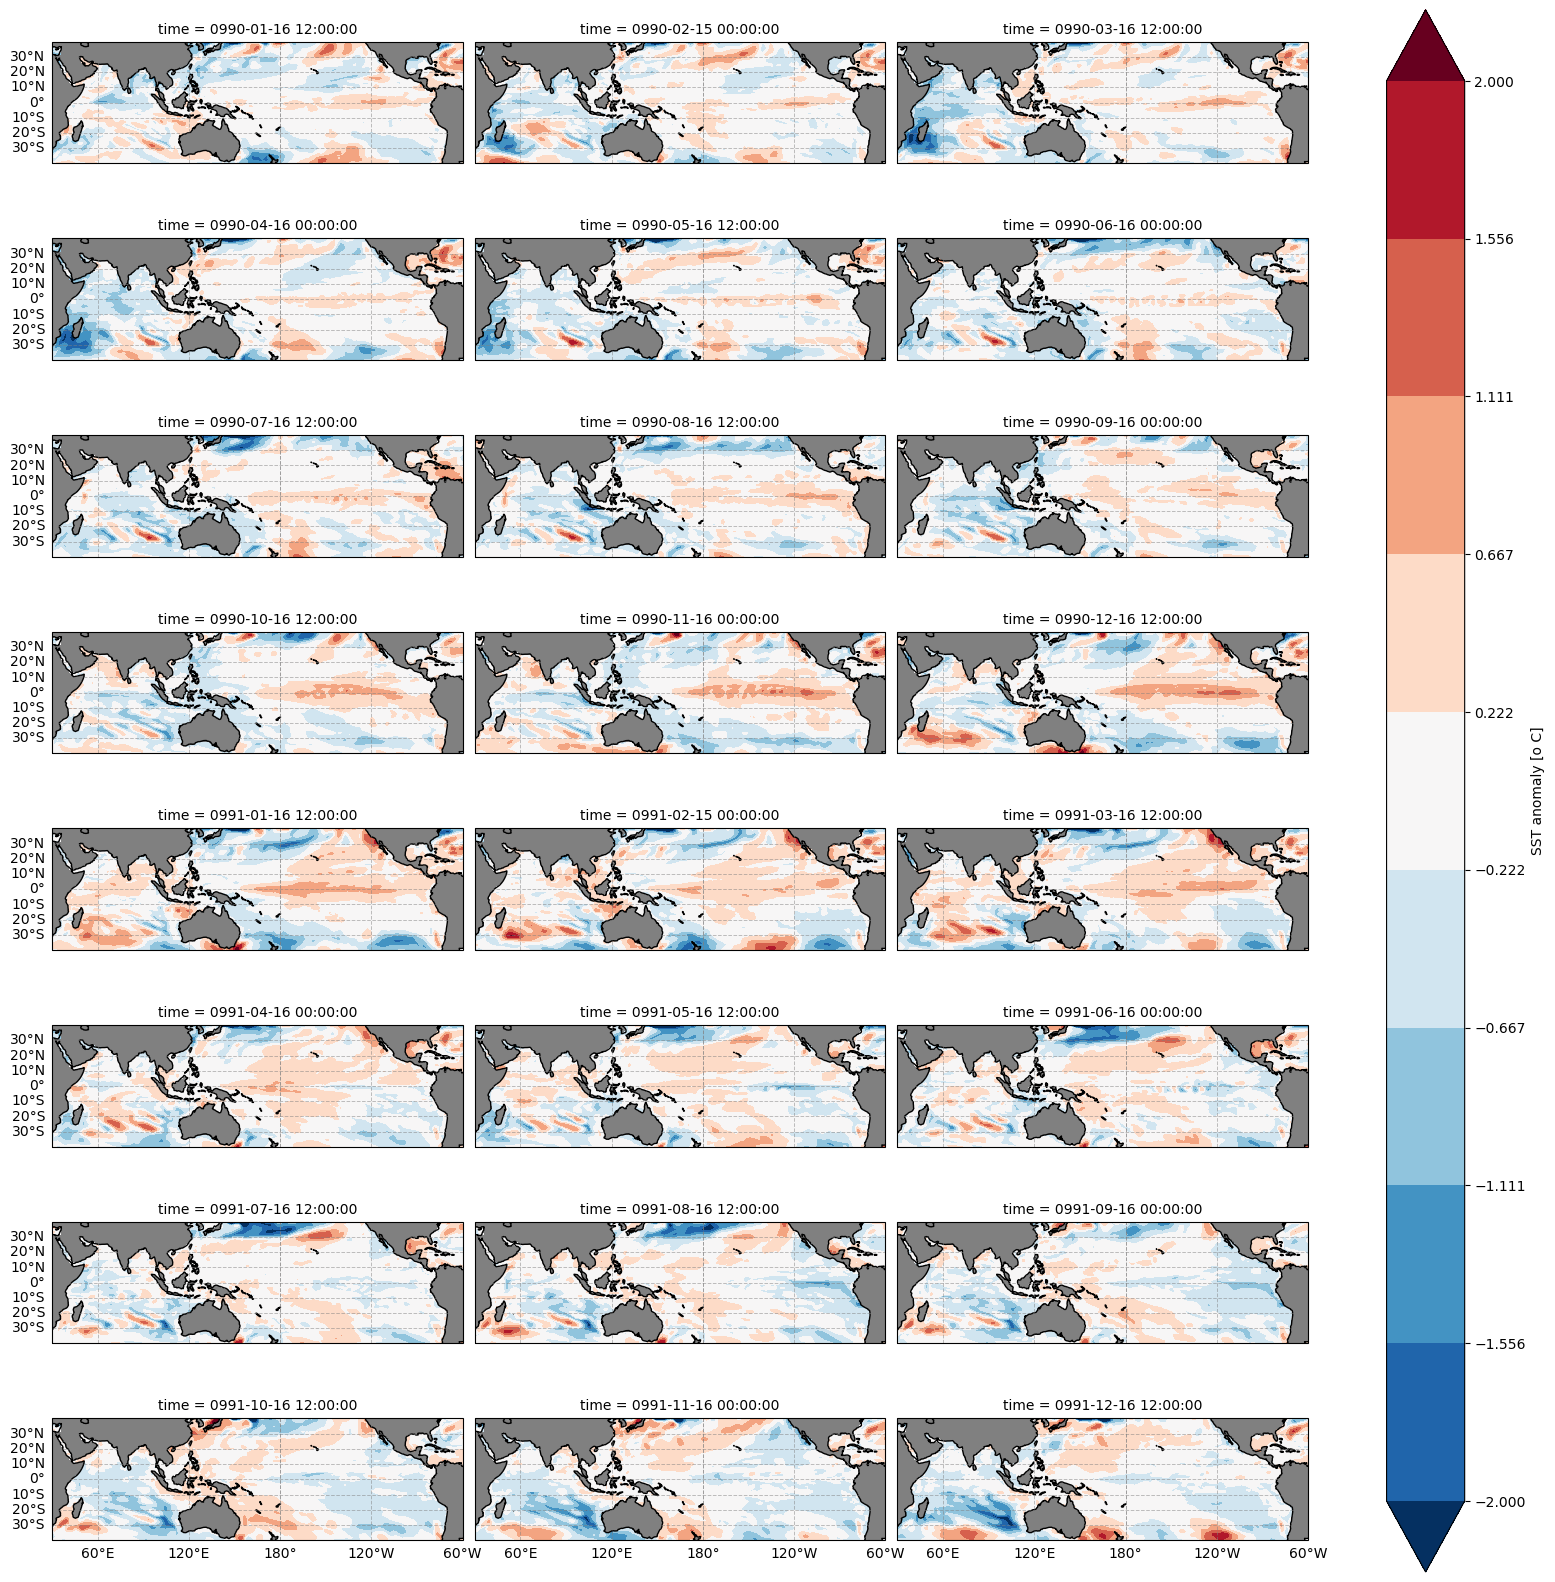

In [17]:
lat_limits = (-40, 40)
lon_limits = (-150, 120) 
fg = cp_hssta01.plot.contourf(col="time", col_wrap = 3, transform=ccrs.PlateCarree(),
                subplot_kws={"projection": ccrs.PlateCarree(central_longitude = 180), "xlim": lon_limits, "ylim": lat_limits},
                          figsize=(16,16), vmin = -2, levels =10, extend = 'both',  cmap = 'RdBu_r',
                            cbar_kwargs=dict(label='SST anomaly [o C]'))
for i, ax in enumerate(fg.axs.flat):
    ax.coastlines()
    ax.set_facecolor('grey')
    gl = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True,
                      linewidth=0.7, color='gray', alpha=0.5, linestyle='--')

    if i in [0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20]:
        gl.bottom_labels = False
    if i in [1,2,4,5,7,8,10,11,13,14,16,17,19,20,22,23]:
        gl.left_labels = False
    gl.top_labels = False
    gl.right_labels = False  

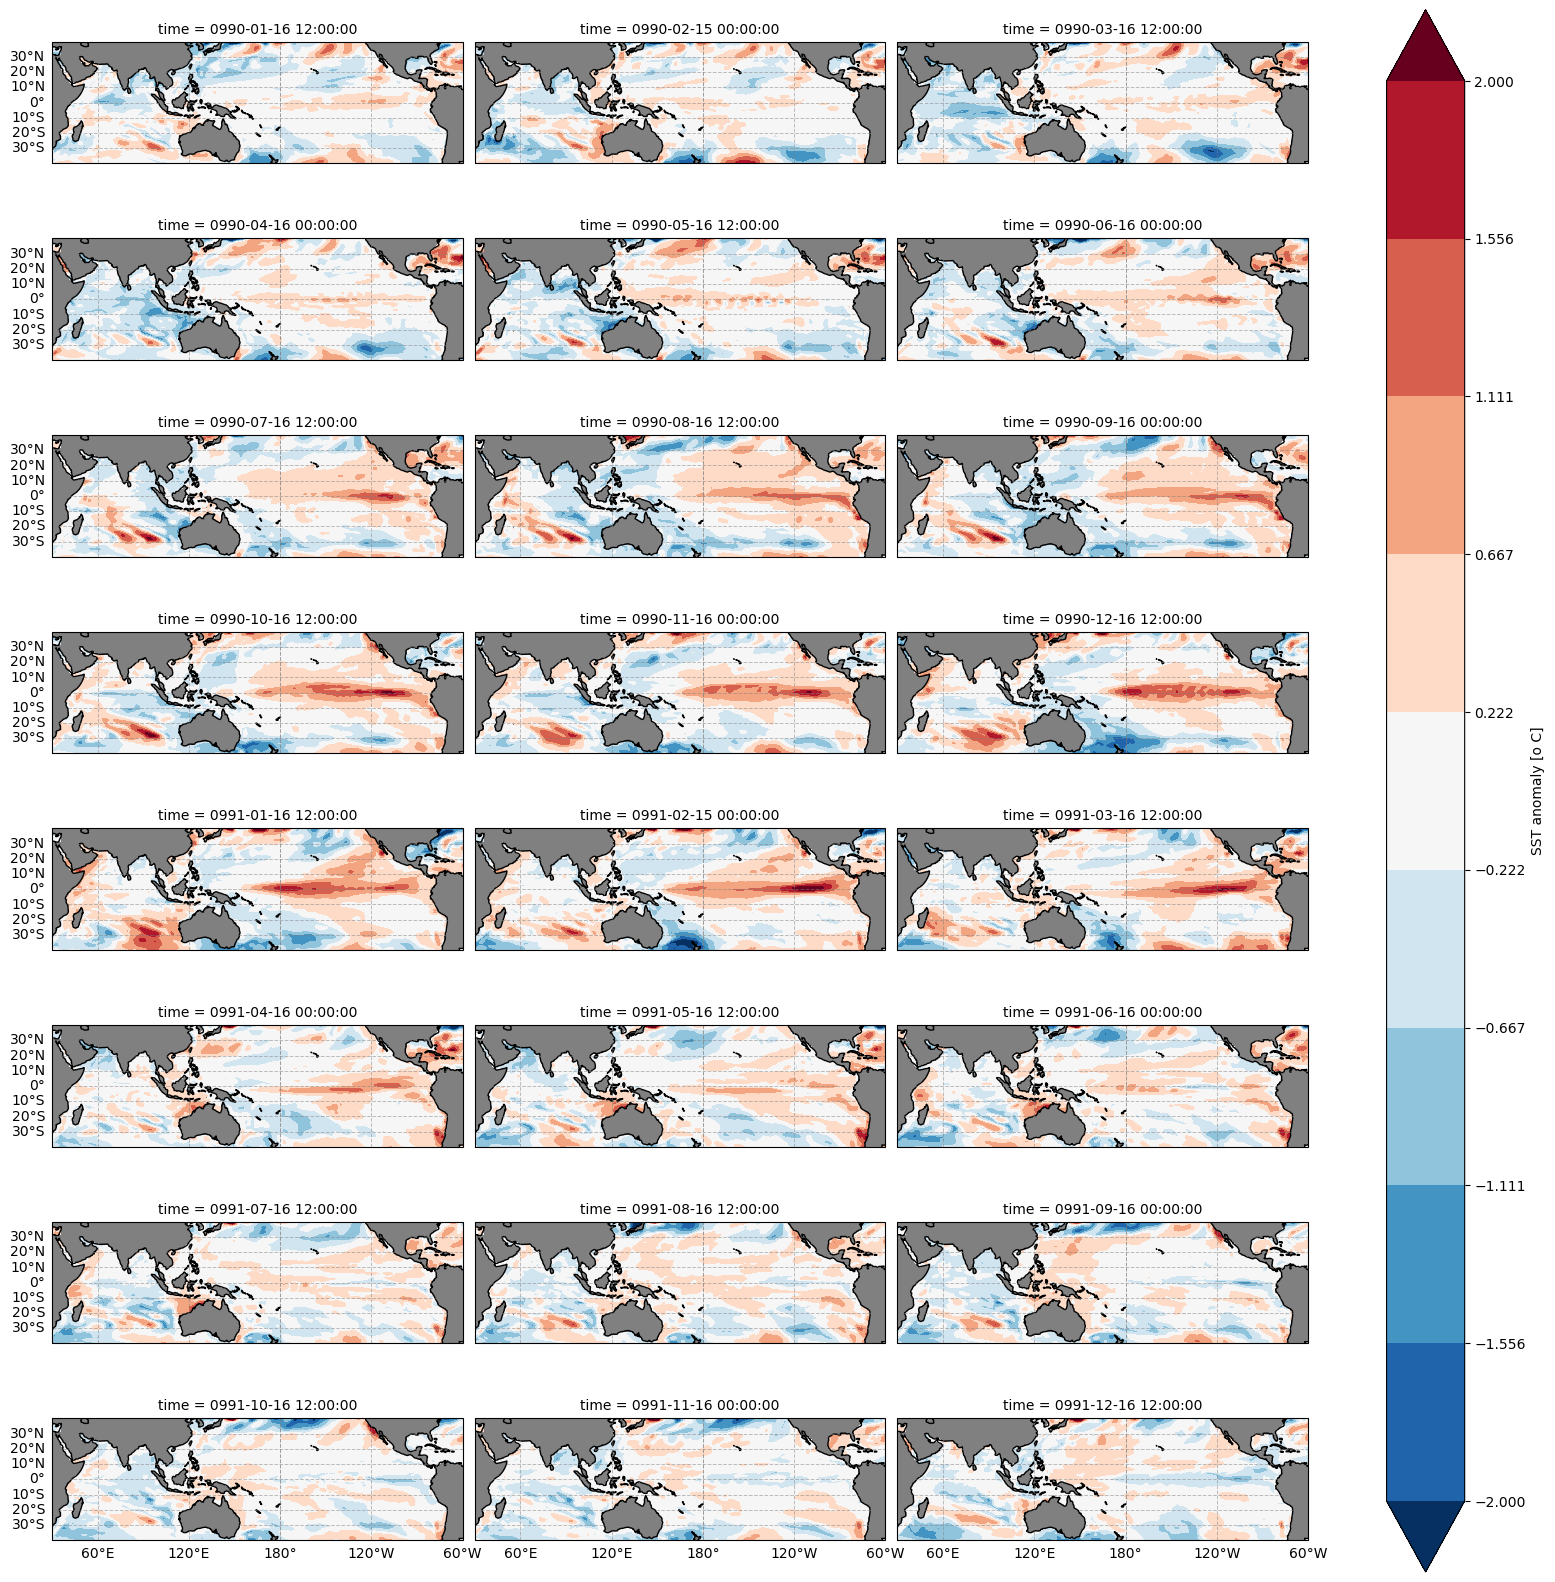

In [18]:
lat_limits = (-40, 40)
lon_limits = (-150, 120) 
fg = cp_mssta01.plot.contourf(col="time", col_wrap = 3, transform=ccrs.PlateCarree(),
                subplot_kws={"projection": ccrs.PlateCarree(central_longitude = 180), "xlim": lon_limits, "ylim": lat_limits},
                          figsize=(16,16), vmin = -2, levels =10, extend = 'both',  cmap = 'RdBu_r',
                            cbar_kwargs=dict(label='SST anomaly [o C]'))
for i, ax in enumerate(fg.axs.flat):
    ax.coastlines()
    ax.set_facecolor('grey')
    gl = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True,
                      linewidth=0.7, color='gray', alpha=0.5, linestyle='--')

    if i in [0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20]:
        gl.bottom_labels = False
    if i in [1,2,4,5,7,8,10,11,13,14,16,17,19,20,22,23]:
        gl.left_labels = False
    gl.top_labels = False
    gl.right_labels = False  

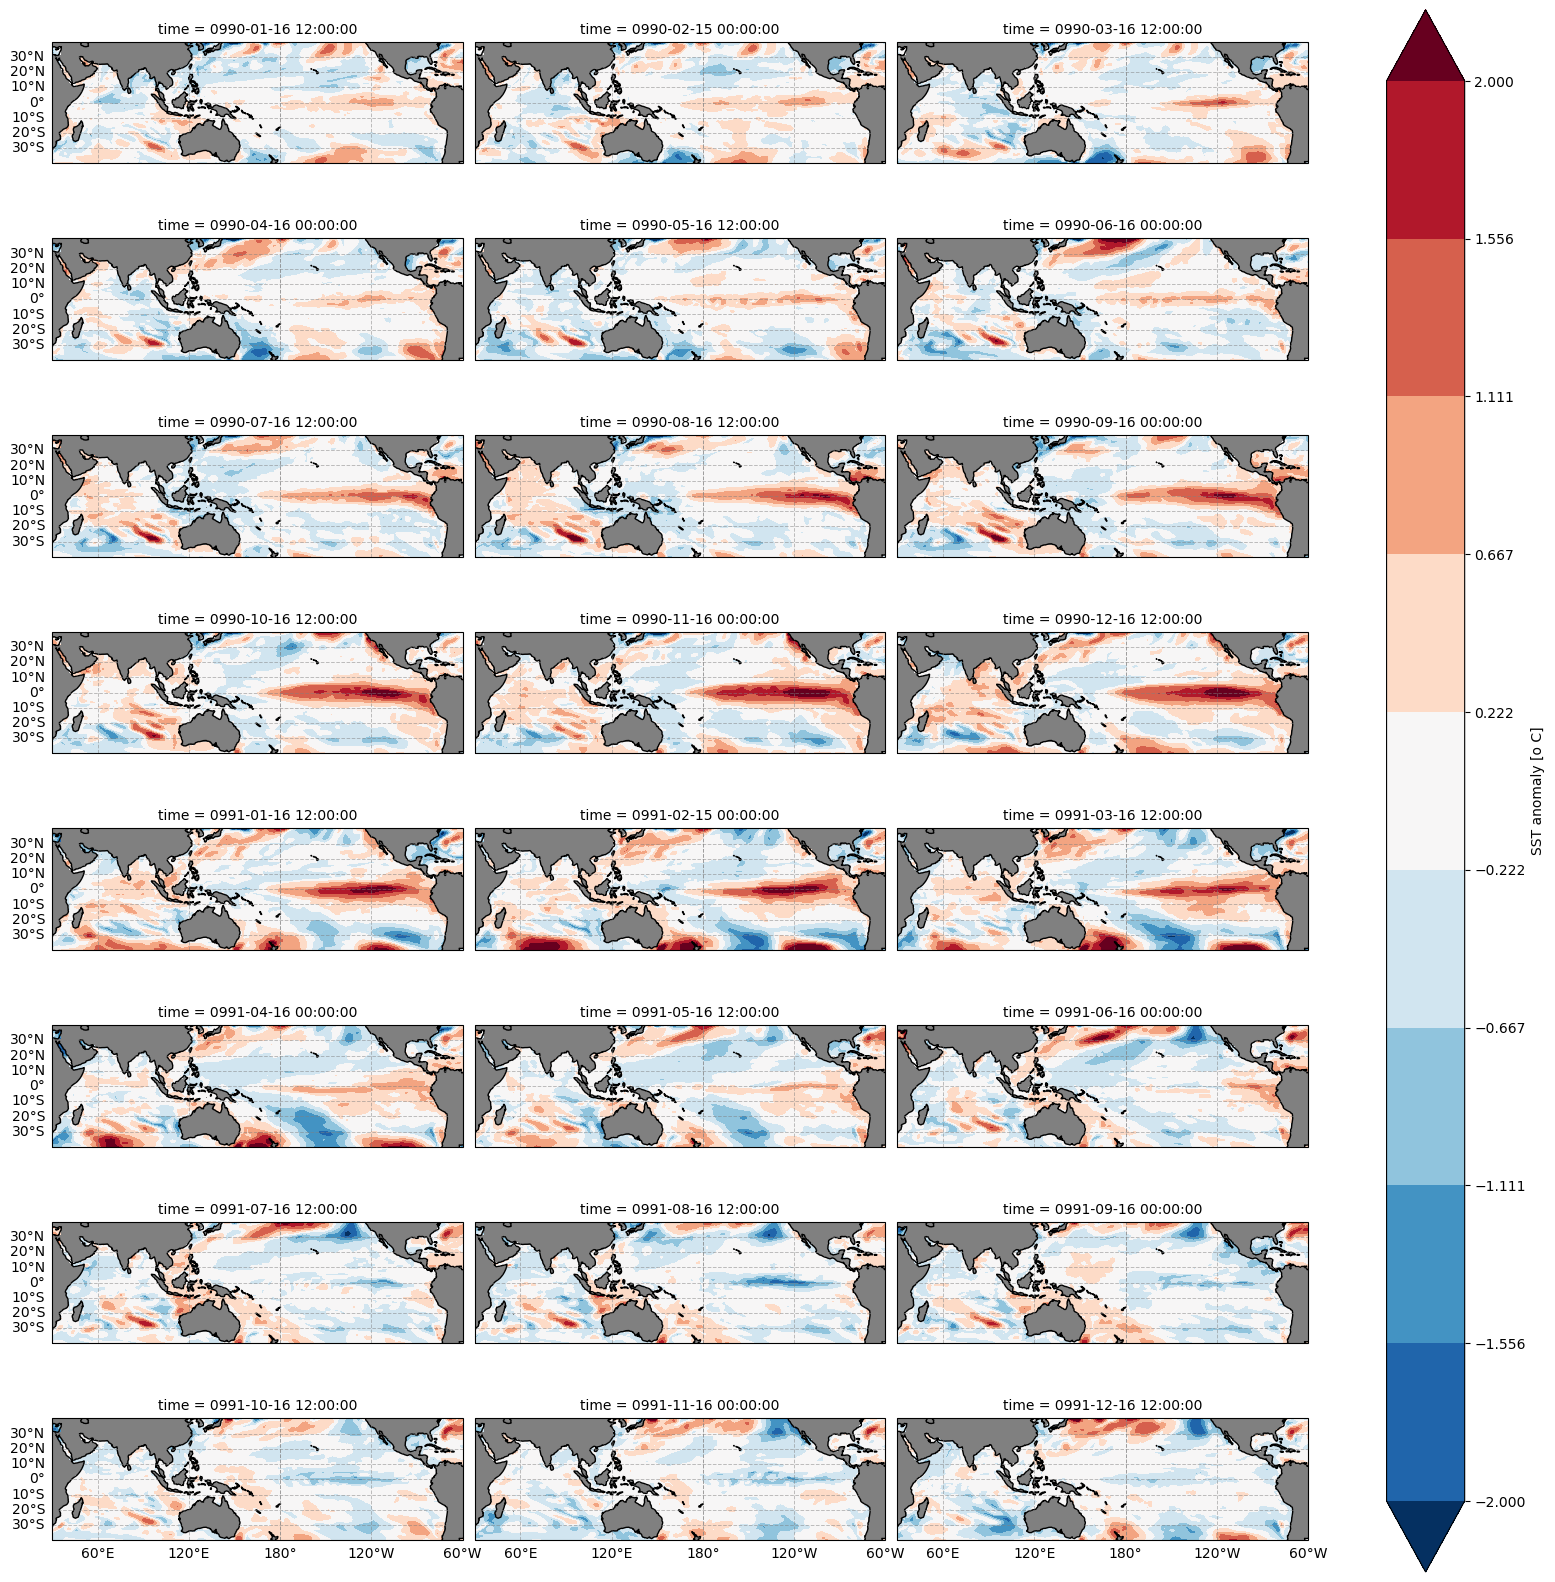

In [19]:
lat_limits = (-40, 40)
lon_limits = (-150, 120) 
fg = ep_hssta01.plot.contourf(col="time", col_wrap = 3, transform=ccrs.PlateCarree(),
                subplot_kws={"projection": ccrs.PlateCarree(central_longitude = 180), "xlim": lon_limits, "ylim": lat_limits},
                          figsize=(16,16), vmin = -2, levels =10, extend = 'both',  cmap = 'RdBu_r',
                            cbar_kwargs=dict(label='SST anomaly [o C]'))
for i, ax in enumerate(fg.axs.flat):
    ax.coastlines()
    ax.set_facecolor('grey')
    gl = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True,
                      linewidth=0.7, color='gray', alpha=0.5, linestyle='--')

    if i in [0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20]:
        gl.bottom_labels = False
    if i in [1,2,4,5,7,8,10,11,13,14,16,17,19,20,22,23]:
        gl.left_labels = False
    gl.top_labels = False
    gl.right_labels = False  

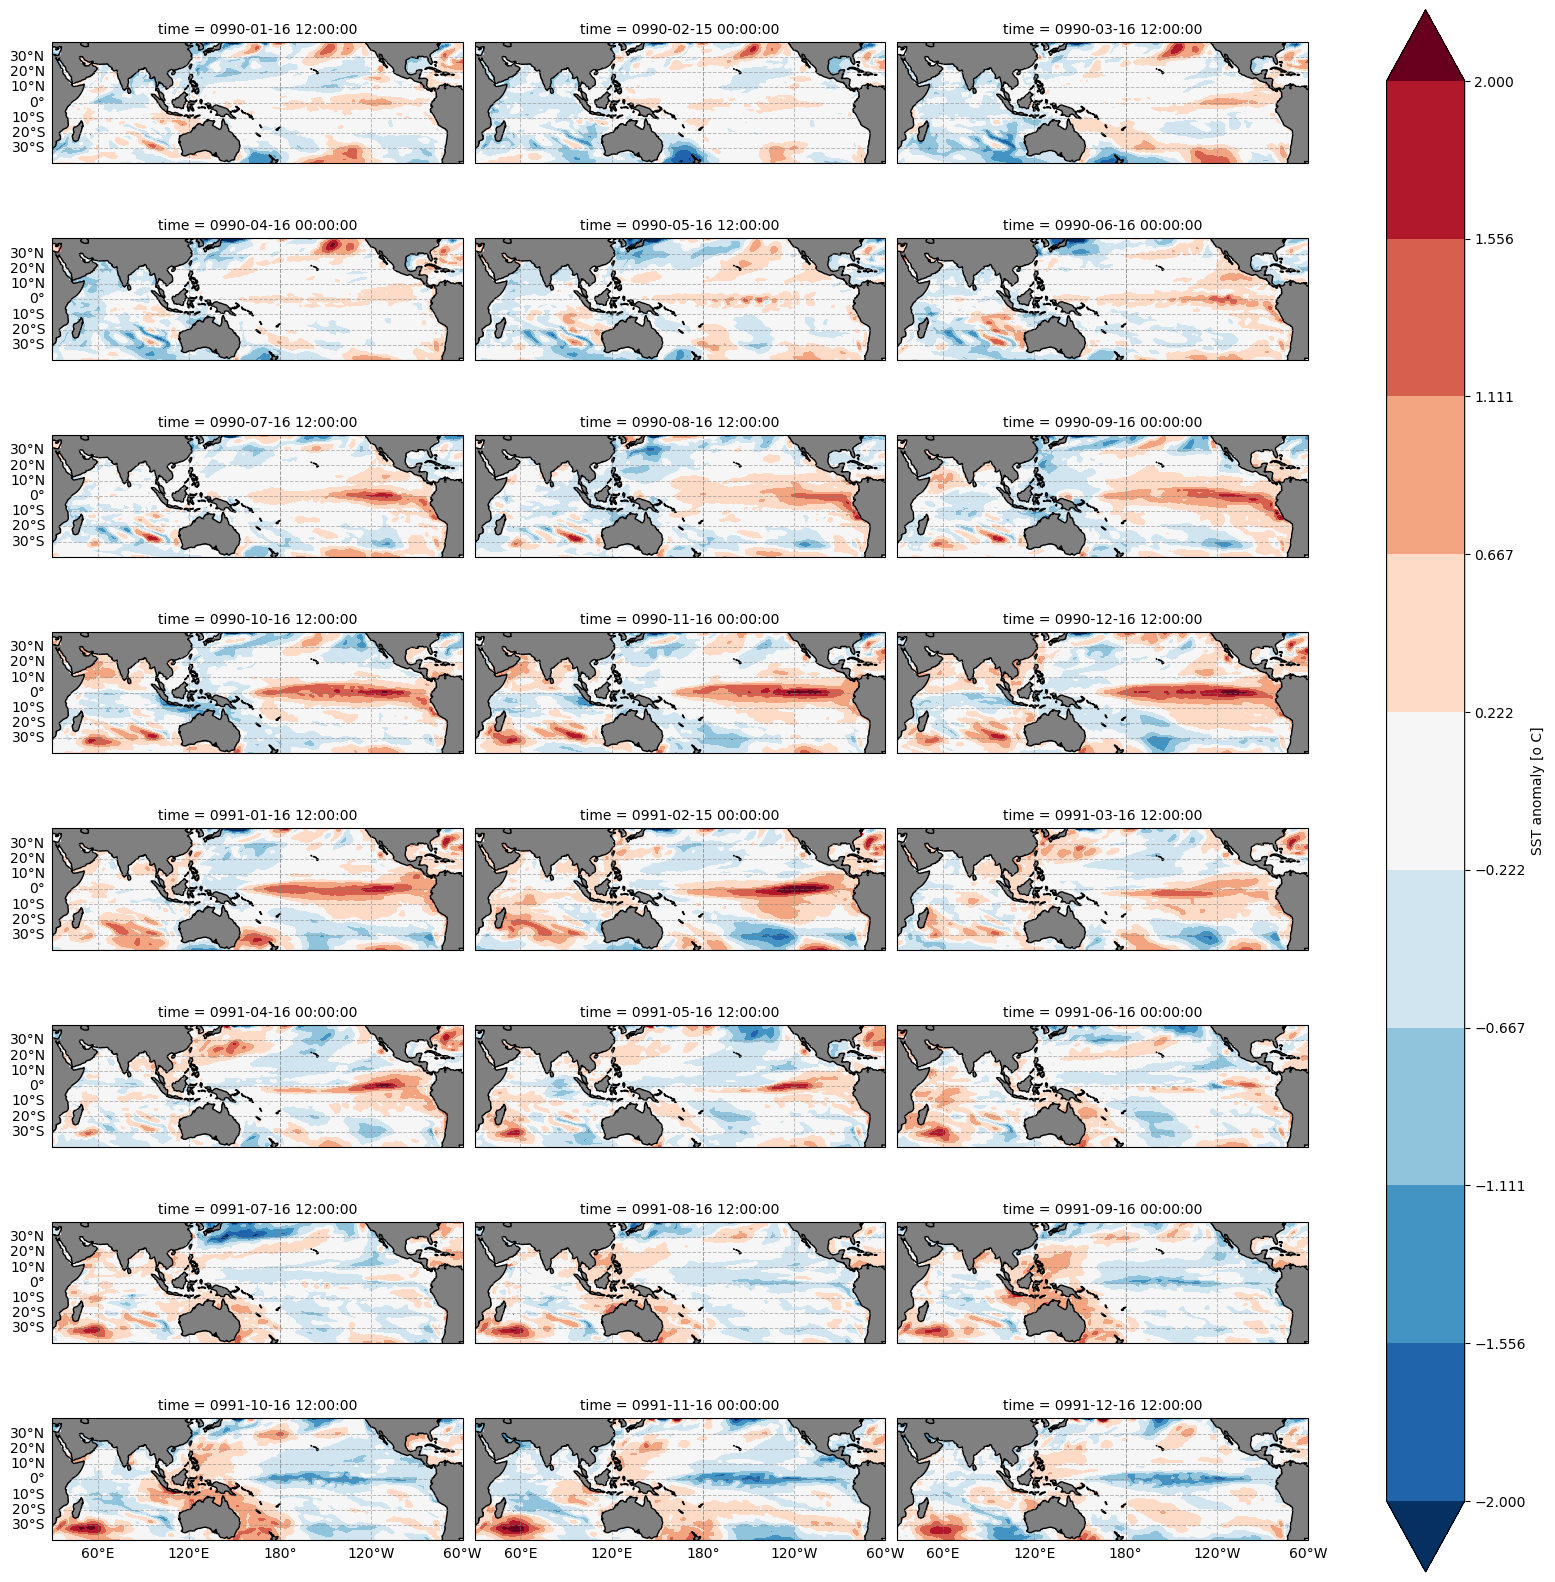

In [20]:
lat_limits = (-40, 40)
lon_limits = (-150, 120) 
fg = ep_mssta01.plot.contourf(col="time", col_wrap = 3, transform=ccrs.PlateCarree(),
                subplot_kws={"projection": ccrs.PlateCarree(central_longitude = 180), "xlim": lon_limits, "ylim": lat_limits},
                          figsize=(16,16), vmin = -2, levels =10, extend = 'both',  cmap = 'RdBu_r',
                            cbar_kwargs=dict(label='SST anomaly [o C]'))
for i, ax in enumerate(fg.axs.flat):
    ax.coastlines()
    ax.set_facecolor('grey')
    gl = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True,
                      linewidth=0.7, color='gray', alpha=0.5, linestyle='--')

    if i in [0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20]:
        gl.bottom_labels = False
    if i in [1,2,4,5,7,8,10,11,13,14,16,17,19,20,22,23]:
        gl.left_labels = False
    gl.top_labels = False
    gl.right_labels = False  

In [40]:
cp_had = xr.open_dataset("/g/data/e14/sm2435/Pacemaker/ocean_month.nc-09901231",  use_cftime=True, chunks= {"time":12})

In [41]:
cp_had1 = xr.open_dataset("/g/data/e14/sm2435/Pacemaker/ocean_month.nc-09911231",  use_cftime=True, chunks= {"time":12})

In [44]:
cp_sst = cp_had.sst.compute()
cp_sst1 = cp_had1.sst.compute()
cp_sst01 = cp_had01.sst.compute()

In [45]:
cp_sst = roll_lon(cp_sst)
cp_sst1 = roll_lon(cp_sst1)
cp_sst01 = roll_lon(cp_sst01)

In [46]:
cp_ssta = cp_sst.groupby("time.month") - ctrl.groupby("time.month").mean("time")
cp_ssta1 = cp_sst1.groupby("time.month") - ctrl.groupby("time.month").mean("time")
cp_ssta01 = cp_sst01.groupby("time.month") - ctrl.groupby("time.month").mean("time")

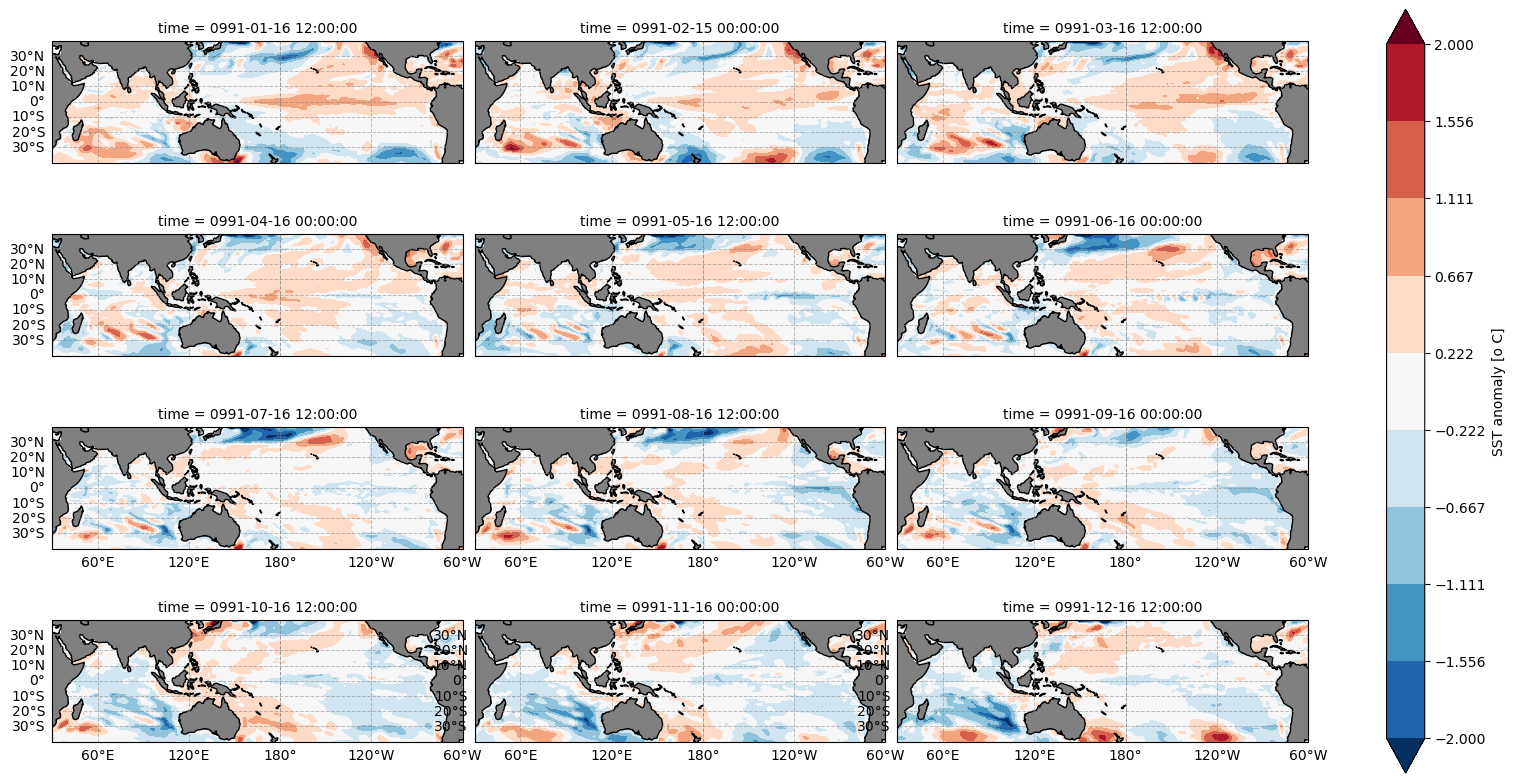

In [22]:
lat_limits = (-40, 40)
lon_limits = (-150, 120) 
fg = cp_ssta1.plot.contourf(col="time", col_wrap = 3, transform=ccrs.PlateCarree(),
                subplot_kws={"projection": ccrs.PlateCarree(central_longitude = 180), "xlim": lon_limits, "ylim": lat_limits},
                          figsize=(16,8), vmin = -2, levels =10, extend = 'both',  cmap = 'RdBu_r',
                            cbar_kwargs=dict(label='SST anomaly [o C]'))
for i, ax in enumerate(fg.axs.flat):
    ax.coastlines()
    ax.set_facecolor('grey')
    gl = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True,
                      linewidth=0.7, color='gray', alpha=0.5, linestyle='--')

    if i in [0,1,2,3,4,5]:
        gl.bottom_labels = False
    if i in [1,2,4,5,7,8]:
        gl.left_labels = False
    gl.top_labels = False
    gl.right_labels = False  

In [21]:
def ssta(DS):
    clim = DS.groupby('time.month').mean('time')
    ssta = DS.groupby('time.month') - clim
    return ssta.drop("month")
def DMI_ctrl(DS):
    WTIO =  ssta(DS).sel(yt_ocean=slice(
         -10, 10),xt_ocean=slice(50, 70)).mean(['yt_ocean', 'xt_ocean'])
    SETIO =  ssta(DS).sel(yt_ocean=slice(
         -10, 0),xt_ocean=slice(90, 110)).mean(['yt_ocean', 'xt_ocean'])
    return (WTIO - SETIO)

def DMI_exp(DS):
    WTIO =  (DS).sel(yt_ocean=slice(
         -10, 10),xt_ocean=slice(50, 70)).mean(['yt_ocean', 'xt_ocean'])
    SETIO =  (DS).sel(yt_ocean=slice(
         -10, 0),xt_ocean=slice(90, 110)).mean(['yt_ocean', 'xt_ocean'])
    return (WTIO - SETIO)

In [22]:
ctrl_dmi_std = DMI_ctrl(ctrl).groupby("time.month").std("time")

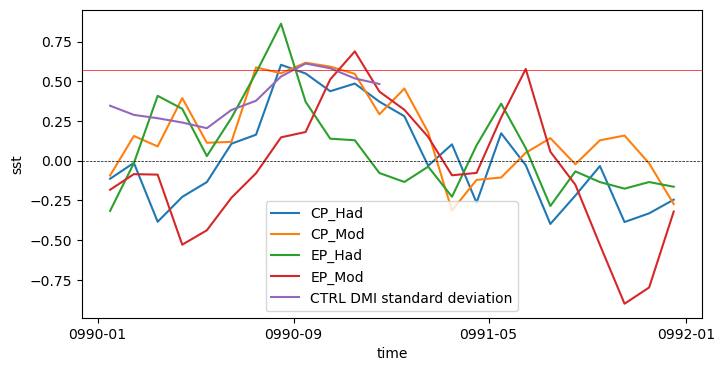

In [27]:
plt.figure(figsize = (8,4))
DMI_exp(cp_hssta01).plot(label = "CP_Had")
DMI_exp(cp_mssta01).plot(label = "CP_Mod")
DMI_exp(ep_hssta01).plot(label = "EP_Had")
DMI_exp(ep_mssta01).plot(label = "EP_Mod")
ctrl_dmi_std.rename({"month": "time"}).assign_coords({"time": cp_hssta01.time[0:12]}).plot(label = "CTRL DMI standard deviation")
#DMI_exp(ctrl990).plot(label = "CTRL restart year")
plt.axhline(DMI_ctrl(ctrl).groupby("time.season")["SON"].std("time").values, lw = 0.5, color = 'r')
plt.axhline(0, lw = 0.5, ls = "--", color = 'k')
plt.legend()

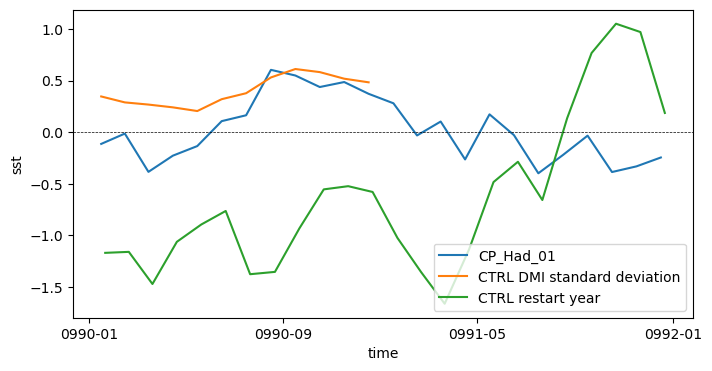

In [59]:
plt.figure(figsize = (8,4))
DMI_exp(cp_ssta01).plot(label = "CP_Had_01")
ctrl_dmi_std.rename({"month": "time"}).assign_coords({"time": cp_sst.time}).plot(label = "CTRL DMI standard deviation")
DMI_exp(ctrl990).plot(label = "CTRL restart year")
plt.axhline(0, lw = 0.5, ls = "--", color = 'k')
plt.legend()

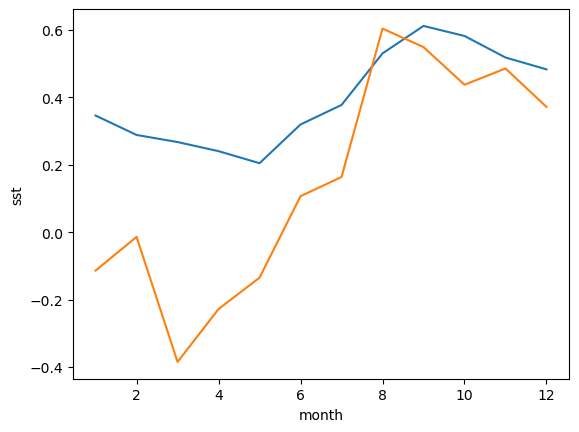

In [41]:
DMI_ctrl(ctrl).groupby("time.month").std("time").plot()
DMI_exp(cp_ssta).groupby("time.month").mean("time").plot()

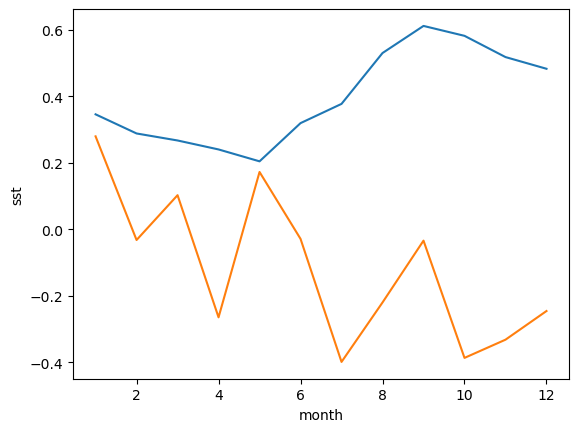

In [24]:
DMI_ctrl(ctrl).groupby("time.month").std("time").plot()
DMI_exp(cp_ssta1).groupby("time.month").mean("time").plot()

In [57]:
ctrl990 = ctrl.sel(time = slice("0990-01-01", "0991-12-31"))

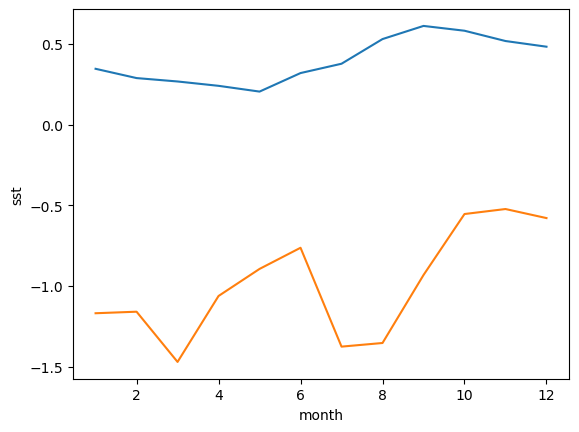

In [28]:
DMI_ctrl(ctrl).groupby("time.month").std("time").plot()
DMI_exp(ctrl990).groupby("time.month").mean("time").plot()
